In [4]:
from PIL import Image, ImageDraw, ImageFont #dynamic import
import glob
import random
import shutil
import os
import os.path as osp
import numpy as np

In [7]:
if not os.path.exists('train_masks'):
    os.makedirs('train_masks')

In [30]:
def change_output_file(ori="train_masks_gif", new="train_masks", new_ext="png"):
    for root, dirs, files in os.walk(ori, topdown=False):
        for file in tqdm.tqdm(files):
            
            name,ext = osp.splitext(file)
            
            # Changing to new file 
            img = Image.open(osp.join(ori, file))

            img.save(f"{new}/{name}.{new_ext}", new_ext, optimize=True)            
            
change_output_file(ori="train_masks_gif", new="train_masks")

100%|██████████| 5088/5088 [05:36<00:00, 15.11it/s]


In [56]:
def data_splitting(image_folder, mask_folder, train=0.8, valid=0.15, test=0.05):
    
    random.seed(1)    
    
    for root, dirs, files in os.walk(image_folder, topdown=False):
        for file in tqdm.tqdm(files):
            name, ext = osp.splitext(file)

            # Select folder name
            rand = random.random()

            if rand < train:
                folder_prefix = 'train'

            elif rand < train+valid:
                folder_prefix = 'valid'

            else:
                folder_prefix = 'test'

            imgs = f'{folder_prefix}'
            annot = f'{folder_prefix}_annotation'

            # Check for folder existence
            if not os.path.exists(imgs):
                os.makedirs(imgs)
                os.makedirs(annot)

            shutil.copy(src=osp.join(image_folder, file) ,dst=osp.join(imgs, file))
            
            # Assuming png image for the masks
            # NOTE: masks have the '_mask' suffix, we'll remove them in main annotation folder
            shutil.copy(src=osp.join(mask_folder, f'{name}_mask.png') ,dst=osp.join(annot, f'{name}.png'))
            


In [57]:
data_splitting('train_images', 'train_masks')

100%|██████████| 5088/5088 [00:45<00:00, 110.92it/s]


## Visualizations

In [2]:
import matplotlib.pyplot as plt
import cv2

In [5]:
def _give_filenames(x):
    return osp.splitext(osp.basename(x))[0]

train_files = list(map(_give_filenames, glob.glob('train/*.jpg')))

In [6]:
train_files

['00087a6bd4dc_01',
 '00087a6bd4dc_03',
 '00087a6bd4dc_04',
 '00087a6bd4dc_05',
 '00087a6bd4dc_06',
 '00087a6bd4dc_07',
 '00087a6bd4dc_08',
 '00087a6bd4dc_09',
 '00087a6bd4dc_10',
 '00087a6bd4dc_12',
 '00087a6bd4dc_13',
 '00087a6bd4dc_14',
 '00087a6bd4dc_15',
 '00087a6bd4dc_16',
 '02159e548029_01',
 '02159e548029_04',
 '02159e548029_05',
 '02159e548029_06',
 '02159e548029_08',
 '02159e548029_09',
 '02159e548029_10',
 '02159e548029_11',
 '02159e548029_12',
 '02159e548029_13',
 '02159e548029_14',
 '02159e548029_15',
 '02159e548029_16',
 '03a857ce842d_01',
 '03a857ce842d_02',
 '03a857ce842d_03',
 '03a857ce842d_04',
 '03a857ce842d_06',
 '03a857ce842d_07',
 '03a857ce842d_08',
 '03a857ce842d_11',
 '03a857ce842d_12',
 '03a857ce842d_13',
 '03a857ce842d_14',
 '03a857ce842d_16',
 '0495dcf27283_02',
 '0495dcf27283_03',
 '0495dcf27283_04',
 '0495dcf27283_07',
 '0495dcf27283_08',
 '0495dcf27283_09',
 '0495dcf27283_10',
 '0495dcf27283_11',
 '0495dcf27283_12',
 '0495dcf27283_13',
 '0495dcf27283_14',


In [ ]:
fig, ax = plt.subplots()

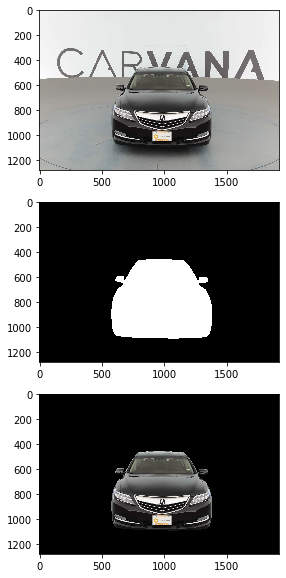

In [19]:
def display_img(name):
    actual = cv2.imread(f'train/{name}.jpg')   
    mask = Image.open(f'train_annotation/{name}.png')
    img_vec = np.asarray(mask)    
    mask_img = cv2.bitwise_and(actual,actual,mask=img_vec) 

    fig = plt.figure(figsize=(10,10))
    
    ax1 = fig.add_subplot(3,1,1)
    
    ax1.imshow(actual)
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.imshow(mask)
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.imshow(mask_img)
    
    
display_img(train_files[0])

## Image size

In [11]:
for i in range(10):
    mask = Image.open(f'train_annotation/{train_files[i]}.png')
    img_vec = np.asarray(mask)    
    print(img_vec.shape)
# np.unique(img_vec)

(1280, 1918)
(1280, 1918)
(1280, 1918)
(1280, 1918)
(1280, 1918)
(1280, 1918)
(1280, 1918)
(1280, 1918)
(1280, 1918)
(1280, 1918)


In [14]:
s = np.array(img_vec).shape

In [18]:
def div(s, fac):
    return s[0]/2**fac, s[1]/2**fac

div(s,4)

(80.0, 119.875)

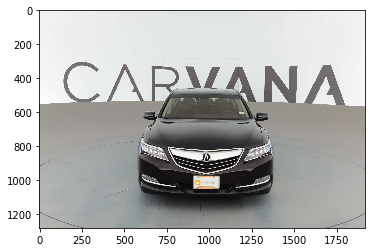

In [20]:
actual = cv2.imread(f'train/{train_files[0]}.jpg')   
plt.imshow(actual)

In [22]:
mask = Image.open(f'train_annotation/{train_files[0]}.png')
img_vec = np.asarray(mask)    
mask_img = cv2.bitwise_and(actual,actual,mask=img_vec) 


In [29]:
img_vec.shape, actual.shape

((1280, 1918), (1280, 1918, 3))

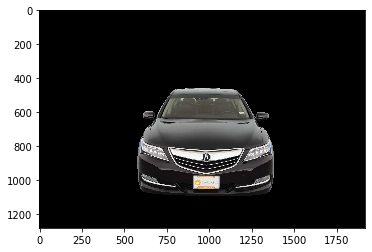

In [25]:
plt.imshow(mask_img)

In [ ]:
def resize_image(image_path):
    """Halving the image size to receive ouput from the endpoint"""
    
    img = Image.open(image_path)
    
    x, y = img.size
    x2, y2 = math.floor(x/2), math.floor(y/2)
#     print(f'{x},{y}->{x2},{y2}')
    resized_img = img.resize((x2,y2),Image.ANTIALIAS)

    return resized_img